### **Fraud Detection in Real Estate Transactions**

This project aims to create a model to detect fraudulent transactions (...) available through the NYC Open Data website. As a Fraud Analyst, we have to question our data, at the same time that we try to understand it through our analysis and talking with other business areas. 

In this case, we'll dive into the data, performing a exploratory analysis so we can understand what kind of data are we dealing here.

#### **Part 1 - Exploratory Analysis**

First, we'll look at how our data is displayed and we'll try to understand and summarize it. The data dictionary is located in the link below:

-- link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x : '%.2f' % x)

In [2]:
# Loading our data
data = pd.read_csv('C:/DS/FraudDetection/dados/dataset.csv', index_col= 0)

In [3]:
# How big our dataset is? Let's see:

print('We have', data.shape[0], 'lines')
print('We have', data.shape[1], 'columns')
print('    -------    ')
print('Our variables are: \n', data.columns.tolist())
print('    -------    ')
print('Null values in these columns: \n', data.isnull().sum())
print('    -------    ')
print('Unique values in these columns: \n', data.nunique(), 'unique values')

We have 1070994 lines
We have 31 columns
    -------    
Our variables are: 
 ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']
    -------    
Null values in these columns: 
 BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD     

Above, we can see that we have a lot of columns with too much null values. 

For example, looking at the column names, AVLAND and AVLAND2 seem to refer to the same information, but AVLAND2 has a huge amount of null values. Other columns also show a similar behavior. Let's check these two columns to make sure we can discard one of them.

In [4]:
# Here, we extract 10 lines randomly. Let's see how they look like.
print(data[['AVLAND','AVLAND2']].sample(10))

# Using .describe() we can see more stats about these columns.
print(data[['AVLAND','AVLAND2']].describe())


         AVLAND  AVLAND2
RECORD                  
513492 15970.00      NaN
805445 11880.00      NaN
154484  3441.00      NaN
964506 45552.00      NaN
522825 16908.00      NaN
553089 12207.00      NaN
768057 18475.00      NaN
61552  13595.00 13595.00
175676 69750.00 62640.00
331864 12752.00      NaN
             AVLAND       AVLAND2
count    1070994.00     282726.00
mean       85067.92     246235.72
std      4057260.06    6178962.56
min            0.00          3.00
25%         9180.00       5705.00
50%        13678.00      20145.00
75%        19740.00      62640.00
max   2668500000.00 2371005000.00


It seems that these are two number columns, and they seem to refer to the value of the land according to the dictionary. Due to the amount of null data, we'll prioritize AVLAND.

Moving on... 

- the column BBLE seems to be an ID. The dictionary mentions that it is a "Concatenation of AV_BORO, AV_BLOCK, AV_LOT, AV_EASEMENT".
- the column B seems to be a categorical variable. The dictionary mentions that there are 5 possible codes being used here.

**Separating Numerical and Categorical variables**

The .info() method can detected the type of data present in our columns. Sometimes it may choose the wrong datatype, but it works in most cases. We'll confirm later if everything is correct.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070994 entries, 1 to 1070994
Data columns (total 31 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   BBLE      1070994 non-null  object 
 1   B         1070994 non-null  int64  
 2   BLOCK     1070994 non-null  int64  
 3   LOT       1070994 non-null  int64  
 4   EASEMENT  4636 non-null     object 
 5   OWNER     1039249 non-null  object 
 6   BLDGCL    1070994 non-null  object 
 7   TAXCLASS  1070994 non-null  object 
 8   LTFRONT   1070994 non-null  int64  
 9   LTDEPTH   1070994 non-null  int64  
 10  EXT       354305 non-null   object 
 11  STORIES   1014730 non-null  float64
 12  FULLVAL   1070994 non-null  float64
 13  AVLAND    1070994 non-null  float64
 14  AVTOT     1070994 non-null  float64
 15  EXLAND    1070994 non-null  float64
 16  EXTOT     1070994 non-null  float64
 17  EXCD1     638488 non-null   float64
 18  STADDR    1070318 non-null  object 
 19  ZIP       1041104 non-null

Let's divide them in two objects:

In [6]:
# Numerical columns
num_cols = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', \
            'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']

In [7]:
# Categorical columns
cat_cols = ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'EXCD1', 'STADDR', 'ZIP',\
            'EXMPTCL', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

In [8]:
# Creating two dataframes for each data type
df_num = data[num_cols]
df_cat = data[cat_cols]

Now, let's create a stastical summary of our numerical columns:

In [9]:
summ_num = pd.DataFrame(index = df_num.columns)
summ_num['Data type'] = df_num.dtypes.values
summ_num['# Non Null Registries'] = df_num.count().values
summ_num['# Non zero Registries'] = df_num.astype(bool).sum(axis = 0)
summ_num['% Populated'] = round(summ_num['# Non Null Registries'] / df_num.shape[0]*100,2)
summ_num['# Unique values'] = df_num.nunique().values
summ_num['Mean'] = round(df_num.mean(),2)
summ_num['Std'] = round(df_num.std(),2)
summ_num['Min'] = round(df_num.min(),2)
summ_num['Max'] = round(df_num.max(),2)
summ_num

,Data type,# Non Null Registries,# Non zero Registries,% Populated,# Unique values,Mean,Std,Min,Max
LTFRONT,int64,1070994,901886,100.00,1297,36.64,74.03,0.00,9999.00
LTDEPTH,int64,1070994,900866,100.00,1370,88.86,76.40,0.00,9999.00
STORIES,float64,1014730,1070994,94.75,111,5.01,8.37,1.00,119.00
FULLVAL,float64,1070994,1057987,100.00,109324,874264.51,11582430.99,0.00,6150000000.00
AVLAND,float64,1070994,1057985,100.00,70921,85067.92,4057260.06,0.00,2668500000.00
AVTOT,float64,1070994,1057987,100.00,112914,227238.17,6877529.31,0.00,4668308947.00
EXLAND,float64,1070994,579295,100.00,33419,36423.89,3981575.79,0.00,2668500000.00
EXTOT,float64,1070994,638422,100.00,64255,91186.98,6508402.82,0.00,4668308947.00
BLDFRONT,int64,1070994,842179,100.00,612,23.04,35.58,0.00,7575.00
BLDDEPTH,int64,1070994,842141,100.00,621,39.92,42.71,0.00,9393.00


Then, a statistical summary of our categorical columns:

In [10]:
summ_cat = pd.DataFrame(index = df_cat.columns)
summ_cat['Data type'] = df_cat.dtypes.values
summ_cat['# Non Null Registries'] = df_cat.count().values
summ_cat['% Populated'] = round(summ_cat['# Non Null Registries'] / df_cat.shape[0]*100,2)
summ_cat['# Unique values'] = df_cat.nunique().values
summ_cat

,Data type,# Non Null Registries,% Populated,# Unique values
BBLE,object,1070994,100.00,1070994
B,int64,1070994,100.00,5
BLOCK,int64,1070994,100.00,13984
LOT,int64,1070994,100.00,6366
EASEMENT,object,4636,0.43,12
OWNER,object,1039249,97.04,863346
BLDGCL,object,1070994,100.00,200
TAXCLASS,object,1070994,100.00,11
EXT,object,354305,33.08,3
EXCD1,float64,638488,59.62,129


Let's add a column with the most common value in these columns:

In [11]:
temp = []
for col in cat_cols:
    temp.append(df_cat[col].value_counts().idxmax())
summ_cat['Most common values'] = temp

In [12]:
summ_cat

,Data type,# Non Null Registries,% Populated,# Unique values,Most common values
BBLE,object,1070994,100.00,1070994,1000010101
B,int64,1070994,100.00,5,4
BLOCK,int64,1070994,100.00,13984,3944
LOT,int64,1070994,100.00,6366,1
EASEMENT,object,4636,0.43,12,E
OWNER,object,1039249,97.04,863346,PARKCHESTER PRESERVAT
BLDGCL,object,1070994,100.00,200,R4
TAXCLASS,object,1070994,100.00,11,1
EXT,object,354305,33.08,3,G
EXCD1,float64,638488,59.62,129,1017.00


Although some columns show 'int64' our 'float64' as the data type, they are a categorical column. That can be observed in the **BLOCK** column for example.

**Identifying and exploring variables**

Looking at the data dictionary, we chose some columns that seem more relevant to our exploratory analysis. Just like we saw in AVLAND versus AVLAND2, we have some columns that show little differences from one another, like:

- AV-CURAVL
- AV-CURAVT
- AV-CUREXL
- AV-CUREXT
- AV-CURAVL-ACT
- AV-CURAVT-ACT Length 11 numeric (no decimals)
- AV-CUREXL-ACT
- AV-CUREXT-ACT

Also, some columns didn't had any description on the dictionary. Thus, we chose to ignore them, in order to avoid any interpretative mistakes.

Let's begin!


Variable 1: **BBLE**

Description: Concatenation of AV_BORO, AV_BLOCK, AV_LOT, AV_EASEMENT. An exclusive ID for each registry.

Variable 2: **B**

Description: The Borough code.

Text(0.5, 1.0, 'Count of properties in each borough')

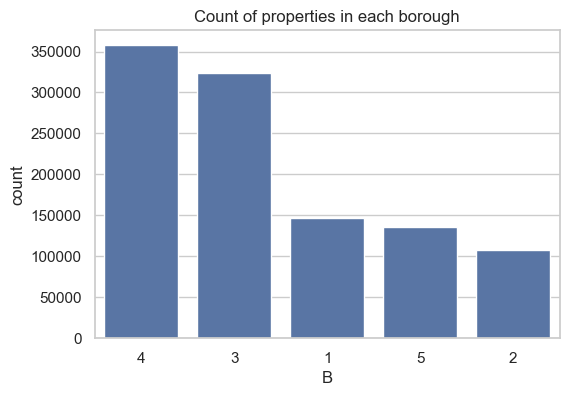

In [13]:
# Visualizing the B variable
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (6, 4))
fig1 = sns.countplot(x = 'B', data = data, order = data['B'].value_counts().index)
plt.title("Count of properties in each borough")

Variable 3: **BLOCK**

Description: The block code.

In [14]:
# No need to create a graph here
BLOCK = df_cat['BLOCK'].value_counts().rename_axis('Block no.').reset_index(name = 'Counts')
BLOCK[:7]

,Block no.,Counts
0,3944,3888
1,16,3786
2,3943,3424
3,3938,2794
4,1171,2535
5,3937,2275
6,1833,1774


Variable 4: **LOT**

Description: The lot code.

In [15]:
# No need to create a graph here
BLOCK = df_cat['LOT'].value_counts().rename_axis('Lot no.').reset_index(name = 'Counts')
BLOCK[:7]

,Lot no.,Counts
0,1,24367
1,20,12294
2,15,12171
3,12,12143
4,14,12074
5,16,12042
6,17,11982


Variable 5: **EASEMENT**

Description: Easement types.

The type E (the most common) indicates 'the portion of the lot that has a Land Easement'. That's expected and it is reasonable.


Text(0.5, 1.0, 'Amount of properties by easement types')

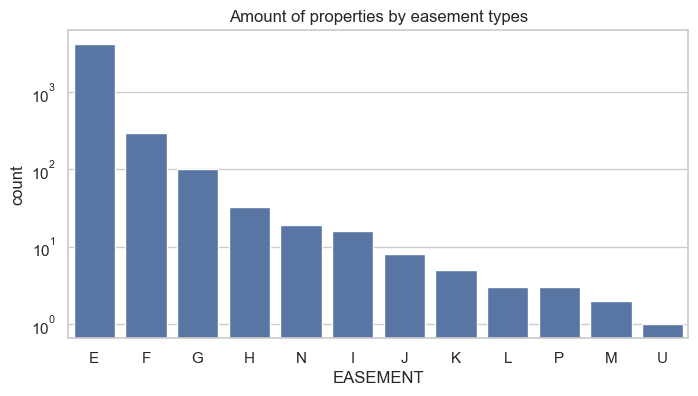

In [16]:
# Let's visualize it
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (8, 4))
fig2 = sns.countplot(x = 'EASEMENT', data = data, order = data['EASEMENT'].value_counts().index)
fig2.set_yscale("log")
fig2.set_title('Amount of properties by easement types')

Variable 6: **OWNER**

Description: The property owner. Here we have names of companies and other individuals.

In [17]:
owner = df_cat['OWNER'].value_counts().rename_axis('Owner').reset_index(name = 'Counts')

In [18]:
owner.head()

,Owner,Counts
0,PARKCHESTER PRESERVAT,6020
1,PARKS AND RECREATION,4255
2,DCAS,2169
3,HOUSING PRESERVATION,1904
4,CITY OF NEW YORK,1450


In [19]:
owner.tail()

,Owner,Counts
863341,ELARIO ALTERNO,1
863342,"CHARLES,VIRGINIA",1
863343,"HAYLES, HEATHER",1
863344,GLENDORA HARVEY,1
863345,EDWARD DONOHUE,1


Variable 7: **BLDGCL**

Description: The building class. It is also related to the tax class.

In [20]:
bldgcl = df_cat['BLDGCL'].value_counts().rename_axis('BLDGCL').reset_index(name = 'Counts')
bldgcl[:7]

,BLDGCL,Counts
0,R4,139879
1,A1,123369
2,A5,96984
3,B1,84208
4,B2,77598
5,C0,73111
6,B3,59240


Variable 8: **TAXCLASS**

Description: Tax code related to the building.

My curiosity sparked here. Does the category 1 really should be the most common here? The dictionary says that this class means "1-3 UNIT RESIDENCES"... 

Well, I've never been to NYC but I guess that most of the residences really are apartments or houses that have 1-3 units. 

But what about class 1D? What does it mean and why is it so low? 

The dictionary mentions that this class is composed of *bungalows*. A quick Google search shows that these kind of property is very rare in NYC. At this moment, there are only ~30 listed for sale, while there are more than 2k residences with 1-3 units listed.

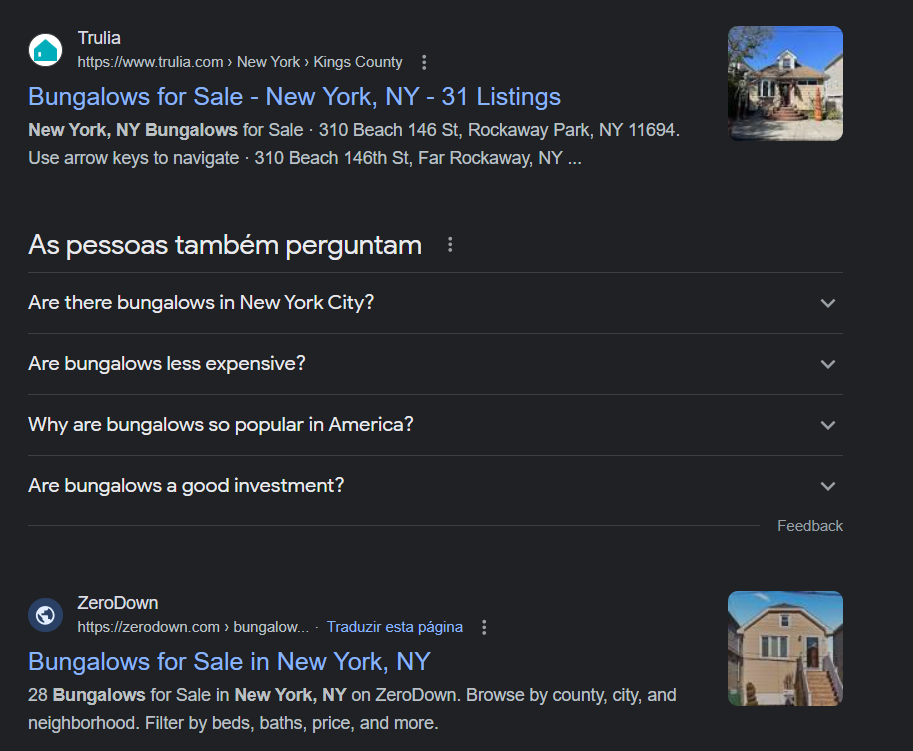


Text(0.5, 1.0, 'Amt of properties for each tax class')

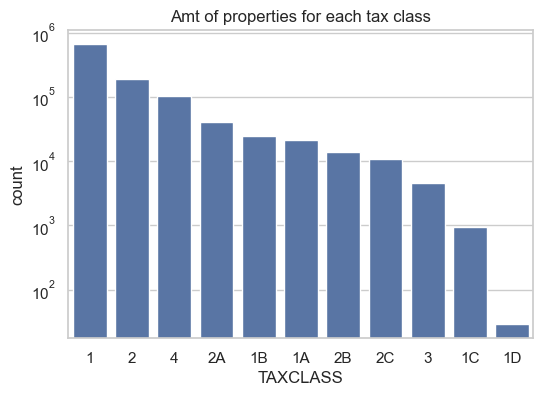

In [21]:
sns.set_theme(style = 'whitegrid', palette='deep')
plt.figure(figsize = (6, 4))
fig3 = sns.countplot(x = 'TAXCLASS', data = data, order = data['TAXCLASS'].value_counts().index)
fig3.set_yscale("log")
fig3.set_title('Amt of properties for each tax class')

Variable 9: **LTFRONT**

Description: Lot Frontage in feet.

It seems a good idea to divide our data percentiles, to visualize how they are distributed. The method .describe() can be used for that.

In [22]:
# Divide em percentis
data['LTFRONT'].describe(percentiles = [0.5,0.75,0.995])

count   1070994.00
mean         36.64
std          74.03
min           0.00
50%          25.00
75%          40.00
99.5%       375.00
max        9999.00
Name: LTFRONT, dtype: float64

Most of the residences (99,5%) are composed of properties equal or less than 375 feet. Let's see how they are distributed in a graph.

In [23]:
tmp = data[data['LTFRONT'] <= 375]

Most of them are in the range of 0-50ft.

Text(0.5, 1.0, 'LTFRONT')

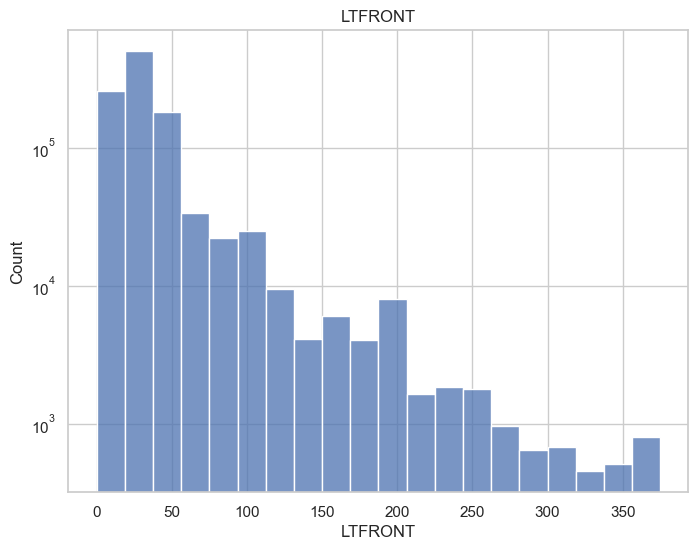

In [24]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (8, 6))
fig4 = sns.histplot(tmp.LTFRONT, bins = 20)
fig4.set_yscale("log")
fig4.set_title('LTFRONT')

Variable 10: **LTDEPTH**

Description: Lot Depth in feet.

In [25]:
# Let's divide it in percentiles again
data['LTDEPTH'].describe(percentiles = [0.18,0.25,0.4,0.83,0.98,0.9995])

count    1070994.00
mean          88.86
std           76.40
min            0.00
18%           49.00
25%           80.00
40%          100.00
50%          100.00
83%          101.00
98%          200.00
99.95%      1056.50
max         9999.00
Name: LTDEPTH, dtype: float64

In [26]:
# Then, let's filter then again.
tmp = data[data['LTDEPTH'] <= 425]

Text(0.5, 1.0, 'LTDEPTH')

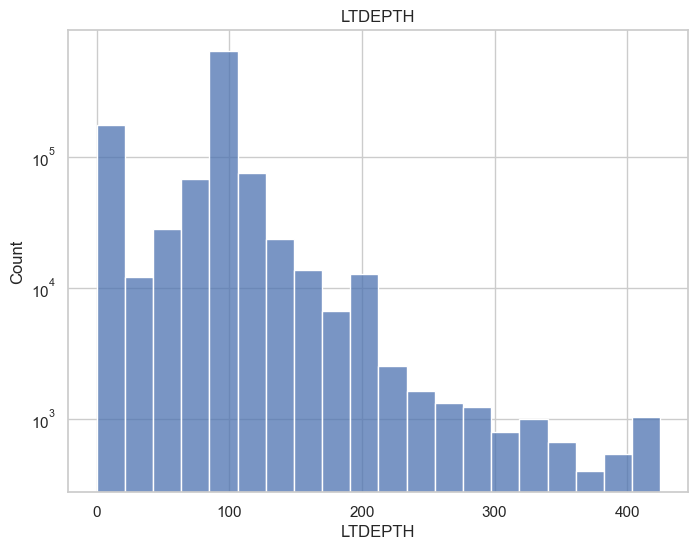

In [27]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (8, 6))
fig5 = sns.histplot(tmp.LTDEPTH, bins = 20)
fig5.set_yscale("log")
fig5.set_title('LTDEPTH')

Variable 11: **EXT**

Description: E- Extension, G- Garage, EG- Extension and Garage.

Text(0.5, 1.0, 'Properties with Extensions')

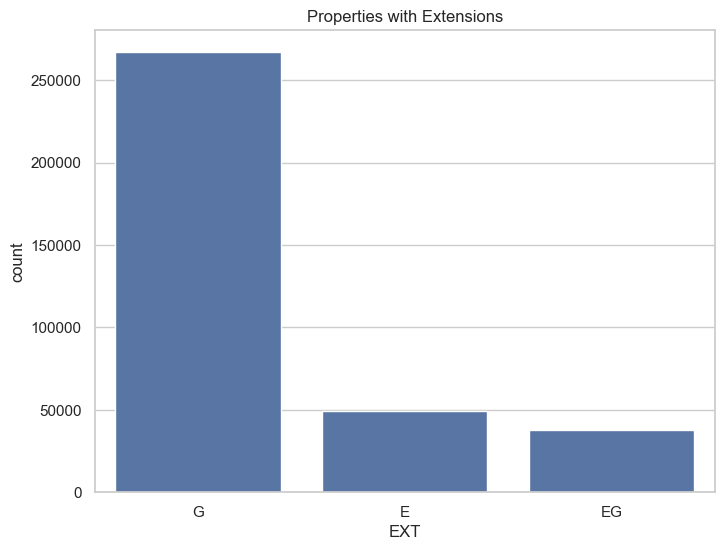

In [28]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (8, 6))
fig6 = sns.countplot(x = 'EXT', data = data, order = data['EXT'].value_counts().index)
fig6.set_yscale("linear")
fig6.set_title('Properties with Extensions')

Variable 12: **STORIES**

Descrption: The number of stories for the building ( # of Floors).

In [29]:
data['STORIES'].describe(percentiles = [0.5,0.75,0.995])

count   1014730.00
mean          5.01
std           8.37
min           1.00
50%           2.00
75%           3.00
99.5%        50.00
max         119.00
Name: STORIES, dtype: float64

In [30]:
# Let's look at the building with 50 or less stories
tmp = data[data['STORIES'] < 50]

Nothing unexpected here. Most of the buildings have 10 or less stories.

Text(0.5, 1.0, 'Amt of stories')

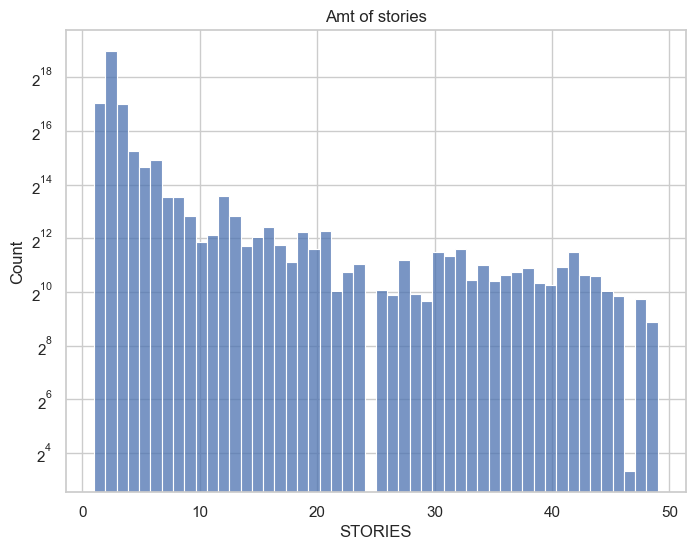

In [31]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (8, 6))
fig7 = sns.histplot(tmp['STORIES'], kde = False, bins = 50)
fig7.set_yscale('log', base = 2)
fig7.set_title('Amt of stories')

Variable 13: **FULLVAL**

Description: Full Market Value

In [32]:
# Dividing in percentiles
data['FULLVAL'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean        874264.51
std       11582430.99
min              0.00
50%         447000.00
75%         619000.00
95%        1530000.00
max     6150000000.00
Name: FULLVAL, dtype: float64

In [33]:
# Visualiza the first rows
data['FULLVAL'].head()

RECORD
1    21400000.00
2   193800000.00
3   104686000.00
4    39200000.00
5   272300000.00
Name: FULLVAL, dtype: float64

In [34]:
# Filtering to avoid outliers
tmp = data[data['FULLVAL'] <= 3000000]

Text(0.5, 1.0, 'Full Market Value distributed between properties')

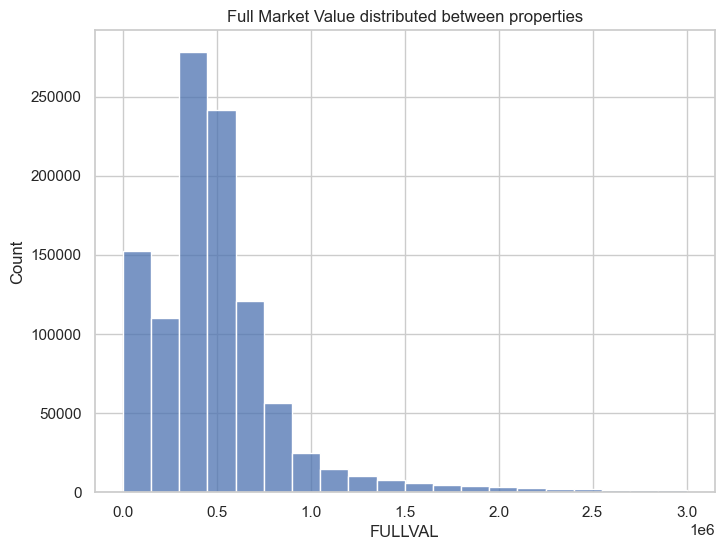

In [35]:
dimentions = (8, 6)
fig, ax = plt.subplots(figsize = dimentions)
fig8 = sns.histplot(tmp.FULLVAL, kde = False, bins = 20)
fig8.set_title('Full Market Value distributed between properties')

Variable 14: **AVLAND**

Description: Land market value.

In [36]:
# Dividing in percentiles
data['AVLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         85067.92
std        4057260.06
min              0.00
50%          13678.00
75%          19740.00
95%         131388.75
max     2668500000.00
Name: AVLAND, dtype: float64

In [37]:
# Filtering
tmp = data[data['AVLAND'] <= 50000]

Text(0.5, 1.0, 'Land Market Value distributed between properties')

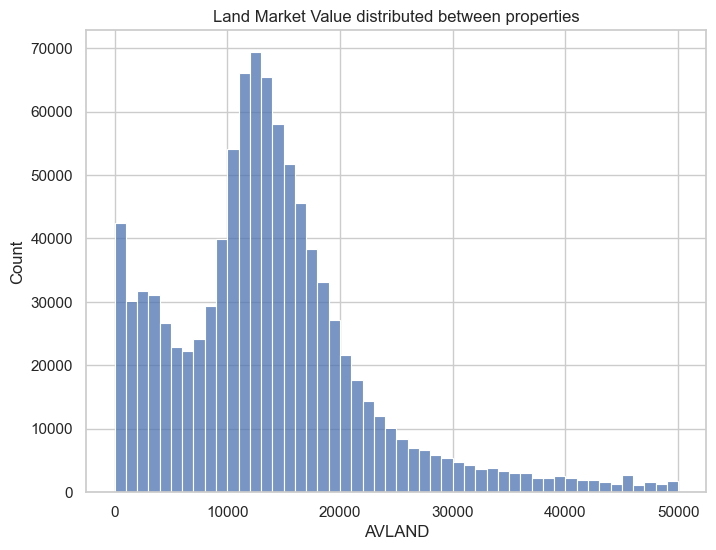

In [38]:
# Visualizing
dimentions = (8, 6)
fig, ax = plt.subplots(figsize = dimentions)
fig9 = sns.histplot(tmp.AVLAND, kde = False, bins = 50)
fig9.set_title('Land Market Value distributed between properties')

Variable 15: **EXLAND**

Description: Transitional land value with an exempt.

In [39]:
# Dividing in percentiles
data['EXLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         36423.89
std        3981575.79
min              0.00
50%           1620.00
75%           1620.00
95%          14489.00
max     2668500000.00
Name: EXLAND, dtype: float64

In [40]:
# Filtering
tmp = data[data['EXLAND'] <= 20000]

Text(0.5, 1.0, 'Land transtional value with an exempt')

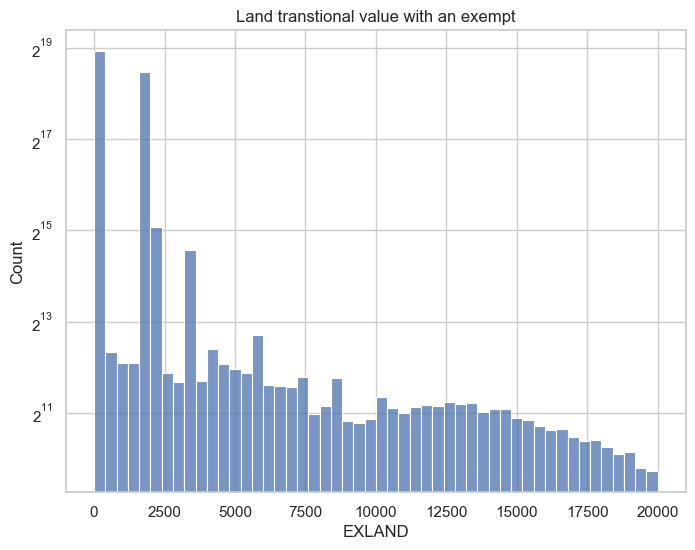

In [41]:
# Visualizing
dimentions = (8, 6)
fig, ax = plt.subplots(figsize = dimentions)
fig11 = sns.histplot(tmp.EXLAND, kde = False, bins = 50)
fig11.set_yscale('log', base = 2)
fig11.set_title('Land transtional value with an exempt')

Variable 16: **ZIP**

Description: The property Zip Code. That's a relevant variable for a Fraud Analysis.

In [42]:
zipcode = df_cat['ZIP'].value_counts().rename_axis('ZIP code').reset_index(name = 'Counts')
zipcode[:7]

,ZIP code,Counts
0,10314.00,24606
1,11234.00,20001
2,10312.00,18127
3,10462.00,16905
4,10306.00,16578
5,11236.00,15678
6,11385.00,14921


Note: We have some NA values here.... We'll deal with them later on.

In [43]:
data['ZIP'].isna().sum()

29890

Conclusion:

- Data seems reasonable
- No strange outliers found
- No explicit anomalies or inconsistencies.

Now we can begin our fraud analysis.

#### **Part 2 - Building a model and assigning a Fraud Score**

Before building our model, we have to consider the fact that there's no variable that mentions whether a transaction is fradulent or not. 

Therefore, we could use a unsupervised model, where we feed the model with inputs (between the variables we analyzed in the Exploratory Analysis) and it returns an output (if a transaction is fraudulent or not, based on a score that indicates a higher or lower chance of a fraudulent transaction).

Initially, our scores will be based on two different Machine Learning techniques. Then, we'll join them and create a final score. My choice to use two scores initially is that I want to obtain a better performance tackling this challenge.

*In a real-world scenario, I would also ask for the feedback of colleagues to conclude if a transaction is fraudulent or not.*

In [44]:
# Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

I'll start by creating a copy of our original dataframe.

In [45]:
df_temp = data.copy()

#### **Part 2.1 - Cleaning the dataset**

**Cleaning the dataset** - ZIP code

In the Exploratory Analysis, we saw a lot of null values in our columns. We'll start by filling the NA values in the Zip column with a strategy that considers the Bourough and the Block codes. 

In [46]:
# First, let's create a function that finds the most common zip code (mode).
# If there's no mode, substitute the NA value with 1.

def calc_mode(x):
    m = pd.Series.mode(x)
    if m.empty:
        x = np.array(range(1,11))
        return x[0]
    else:
        return m.values[0]

In [47]:
# Then, we'll create a function to count the mode values in each group

def counting_values(x):
    return x.value_counts().head(1)

Now, we'll group values using the Borough and Block codes and we'll apply the functions created above. 

This returns the most common Zip Code for each combination of Borough and Block

In [48]:
# Let's create a dataset with Block and Borough and group them by the Zip Codes mode

df_zip_group = df_temp.groupby(['B', 'BLOCK'])['ZIP'].agg(ZIP = calc_mode, Count = counting_values).reset_index()

In [49]:
df_zip_group.head(25)

,B,BLOCK,ZIP,Count
0,1,1,10004.00,2
1,1,2,10004.00,2
2,1,3,10004.00,4
3,1,4,10004.00,53
4,1,5,10004.00,9
5,1,6,10004.00,2
6,1,7,10004.00,15
7,1,8,10004.00,6
8,1,9,10004.00,4
9,1,10,10004.00,8


In [50]:
# For the groups without a mode value, we'll check the group right below and above it.
# We'll use the value with the highest frequency between them.

for i in range(len(df_zip_group)):
    if (df_zip_group.loc[i,'ZIP'] == 1):                                        ## If 1 is here, then there's no mode!
        if df_zip_group.loc[i - 1,'Count'] > df_zip_group.loc[i + 1,'Count']:   ## If the value above is higher than the value below...
            val = df_zip_group.loc[i - 1,'ZIP']                                 ## We'll use the value above
        else:
            val = df_zip_group.loc[i + 1,'ZIP']                                 ## Or we'll use the value below
        df_zip_group.loc[i,'ZIP'] = val

In [51]:
# Now, we'll create a function that fills the missing Zip values using the df_zip_group dataframe

def fill_values(x):
    if pd.isnull(x['ZIP']):
        return df_zip_group[(df_zip_group['B'] == x['B']) & (df_zip_group['BLOCK'] == x['BLOCK'])]['ZIP'].values[0]
    else:
        return x['ZIP']

In [52]:
# Applying the function
df_temp['ZIP'] = df_temp.apply(fill_values, axis = 1)

In [53]:
# Checking if we have any missing values
df_temp['ZIP'].isna().sum()

0

In [54]:
# Checking a random block
df_temp[(df_temp['B']==1) & (df_temp['BLOCK']==28)]['ZIP']

RECORD
5474   10004.00
5475   10004.00
5476   10005.00
5477   10005.00
5478   10005.00
5479   10005.00
5480   10005.00
5481   10005.00
5482   10005.00
5483   10005.00
5484   10005.00
5485   10005.00
5486   10005.00
5487   10005.00
5488   10005.00
5489   10005.00
5490   10005.00
5491   10005.00
5492   10005.00
5493   10005.00
5494   10005.00
5495   10005.00
5496   10005.00
5497   10005.00
5498   10005.00
5499   10005.00
5500   10005.00
5501   10005.00
5502   10005.00
5503   10005.00
5504   10005.00
5505   10005.00
5506   10005.00
5507   10005.00
5508   10005.00
5509   10005.00
5510   10005.00
5511   10005.00
5512   10005.00
5513   10005.00
5514   10005.00
5515   10005.00
5516   10005.00
5517   10005.00
5518   10005.00
5519   10005.00
5520   10005.00
5521   10005.00
5522   10005.00
5523   10005.00
5524   10005.00
5525   10005.00
5526   10005.00
5527   10005.00
5528   10005.00
5529   10005.00
5530   10005.00
5531   10005.00
5532   10005.00
5533   10005.00
5534   10005.00
5535   10005.00
5

In [55]:
# Let's create a copy of this dataset after cleaning the ZIP column
# First, let's convert this variable to a string

df_temp['ZIP'] = df_temp['ZIP'].astype(int).astype(str)
df_temp2 = df_temp.copy()

**Cleaning the dataset** - Other numeric variables

In the Exploratory Analysis, we observed that FULLVAL, AVLAND, AVTOT, BLDFRONT, BLDDEPTH, LTFRONT and LTDEPTH had missing values. 

We are going to use the median here, to fill these gaps. Our goal here is to address the records where we have the number 0.

In [56]:
summ_num = pd.DataFrame(index = df_num.columns)
summ_num['Data type'] = df_num.dtypes.values
summ_num['# Non Null Registries'] = df_num.count().values
summ_num['# Non zero Registries'] = df_num.astype(bool).sum(axis = 0)
summ_num['% Populated'] = round(summ_num['# Non Null Registries'] / df_num.shape[0]*100,2)
summ_num['# Unique values'] = df_num.nunique().values
summ_num['Mean'] = round(df_num.mean(),2)
summ_num['Std'] = round(df_num.std(),2)
summ_num['Min'] = round(df_num.min(),2)
summ_num['Max'] = round(df_num.max(),2)
summ_num

,Data type,# Non Null Registries,# Non zero Registries,% Populated,# Unique values,Mean,Std,Min,Max
LTFRONT,int64,1070994,901886,100.00,1297,36.64,74.03,0.00,9999.00
LTDEPTH,int64,1070994,900866,100.00,1370,88.86,76.40,0.00,9999.00
STORIES,float64,1014730,1070994,94.75,111,5.01,8.37,1.00,119.00
FULLVAL,float64,1070994,1057987,100.00,109324,874264.51,11582430.99,0.00,6150000000.00
AVLAND,float64,1070994,1057985,100.00,70921,85067.92,4057260.06,0.00,2668500000.00
AVTOT,float64,1070994,1057987,100.00,112914,227238.17,6877529.31,0.00,4668308947.00
EXLAND,float64,1070994,579295,100.00,33419,36423.89,3981575.79,0.00,2668500000.00
EXTOT,float64,1070994,638422,100.00,64255,91186.98,6508402.82,0.00,4668308947.00
BLDFRONT,int64,1070994,842179,100.00,612,23.04,35.58,0.00,7575.00
BLDDEPTH,int64,1070994,842141,100.00,621,39.92,42.71,0.00,9393.00


In [57]:
# Replacing 0 with NaN values
df_temp2.replace(0, np.nan, inplace = True)

In [58]:
# Definindo the list of columns that we are going to fill with the median
list_fill = ['FULLVAL', 'AVLAND', 'AVTOT', 'BLDFRONT', 'BLDDEPTH', 'LTFRONT', 'LTDEPTH']

In [59]:
# Counting how many NaN registries we have
for i in list_fill:
    print(i, "--> NaN registries:", df_temp2[i].isna().sum())

FULLVAL --> NaN registries: 13007
AVLAND --> NaN registries: 13009
AVTOT --> NaN registries: 13007
BLDFRONT --> NaN registries: 228815
BLDDEPTH --> NaN registries: 228853
LTFRONT --> NaN registries: 169108
LTDEPTH --> NaN registries: 170128


I've decided to use the same tactic here. Let's use the median of similar groups of Zip and BLDGCL codes.

In [60]:
# Filling NaN values for groups with more than 5 registries
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['ZIP','BLDGCL'])[i].transform(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [61]:
# Let's see how many NaN are left. I know that probably there will be some registries unaffected, but I'll use other categorical
# variables to fill these NaN registries 
for i in list_fill:
    print(i, "--> NaN registries:", df_temp2[i].isna().sum())

FULLVAL --> NaN registries: 10294
AVLAND --> NaN registries: 10294
AVTOT --> NaN registries: 10294
BLDFRONT --> NaN registries: 75202
BLDDEPTH --> NaN registries: 75218
LTFRONT --> NaN registries: 16025
LTDEPTH --> NaN registries: 17764


Now, let's combine the Zip and TAXCLASS codes. Let's keep it applied to groups with more than 5 registries.

In [62]:
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['ZIP','TAXCLASS'])[i].transform(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [63]:
# How many are left?
for i in list_fill:
    print(i, "--> NaN registries:", df_temp2[i].isna().sum())

FULLVAL --> NaN registries: 3915
AVLAND --> NaN registries: 3915
AVTOT --> NaN registries: 3915
BLDFRONT --> NaN registries: 31226
BLDDEPTH --> NaN registries: 31130
LTFRONT --> NaN registries: 3092
LTDEPTH --> NaN registries: 3146


We are making progress. Let's use B and TAXCLASS codes for this one.

In [64]:
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['B','TAXCLASS'])[i].transform(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [65]:
# How many are left?
for i in list_fill:
    print(i, "--> NaN registries:", df_temp2[i].isna().sum())

FULLVAL --> NaN registries: 678
AVLAND --> NaN registries: 678
AVTOT --> NaN registries: 678
BLDFRONT --> NaN registries: 22317
BLDDEPTH --> NaN registries: 18831
LTFRONT --> NaN registries: 2
LTDEPTH --> NaN registries: 2


Almost there. For our last transformation, we'll use only the BLOCK code.

In [66]:
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['B'])[i].transform(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [67]:
# How many are left?
for i in list_fill:
    print(i, "--> NaN registries:", df_temp2[i].isna().sum())

FULLVAL --> NaN registries: 0
AVLAND --> NaN registries: 0
AVTOT --> NaN registries: 0
BLDFRONT --> NaN registries: 0
BLDDEPTH --> NaN registries: 0
LTFRONT --> NaN registries: 0
LTDEPTH --> NaN registries: 0


Nice! No NaN values left. Let's move to the STORIES variable.

**Cleaning the dataset** - STORIES variable

For this variable, we'll repeat the same strategy. Let's use the median of similar groups here.

In [68]:
# Let's start by visualizing how many NaN values we have here.
print('STORIES', "--> NaN registries:", df_temp2['STORIES'].isna().sum())

STORIES --> NaN registries: 56264


First, let's use ZIP and BLDGCL codes.

In [69]:
df_temp2['STORIES'] = df_temp2.groupby(['ZIP','BLDGCL'])['STORIES'].transform(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [70]:
# How many are left?
print('STORIES', "--> NaN registries:", df_temp2['STORIES'].isna().sum())

STORIES --> NaN registries: 42102


Now, let's use BLDGCL alone.

In [71]:
df_temp2['STORIES'] = df_temp2.groupby(['BLDGCL'])['STORIES'].transform(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [72]:
print('STORIES', "--> NaN registries:", df_temp2['STORIES'].isna().sum())

STORIES --> NaN registries: 4280


Finally, TAXCLASS should be enough. 

In [73]:
df_temp2['STORIES'] = df_temp2.groupby(['TAXCLASS'])['STORIES'].transform(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

#### **Part 2.2 - Feature Engineering**

Now it's a great time to reflect: Do we really need all these variables? 

Well, maybe. I'm not an Real Estate expert, but it seems odd that we don't have a variable regarding the area of these properties, which is very important to know. Let's build it right away!

In [74]:
# Let's create a copy of our dataframe.
df_proc = df_temp2.copy()

In [75]:
# LTFRONT * LTDEPTH
df_proc['AREA1'] = df_proc['LTFRONT'] * df_proc['LTDEPTH']

In [76]:
# Visualiza amostra
df_proc[['AREA1', 'LTFRONT', 'LTDEPTH']].head()

,AREA1,LTFRONT,LTDEPTH
RECORD,,,
1,523000.00,500.00,1046.00
2,9585.00,27.00,355.00
3,399876.00,709.00,564.00
4,436943.00,793.00,551.00
5,406980.00,323.00,1260.00


In [77]:
# BLDFRONT * BLDDEPTH
df_proc['AREA2'] = df_proc['BLDFRONT'] * df_proc['BLDDEPTH']

In [78]:
# Visualiza amostra
df_proc[['AREA2', 'BLDFRONT', 'BLDDEPTH']].head()

,AREA2,BLDFRONT,BLDDEPTH
RECORD,,,
1,121476.00,382.00,318.00
2,121476.00,382.00,318.00
3,399876.00,709.00,564.00
4,46835.00,85.00,551.00
5,5073.00,89.00,57.00


In [79]:
# AREA2 * STORIES
df_proc['AREA3'] = df_proc['AREA2'] * df_proc['STORIES']

In [80]:
# Visualiza amostra
df_proc[['AREA2', 'STORIES', 'AREA3']].head()

,AREA2,STORIES,AREA3
RECORD,,,
1,121476.00,4.00,485904.00
2,121476.00,1.00,121476.00
3,399876.00,3.00,1199628.00
4,46835.00,2.00,93670.00
5,5073.00,1.00,5073.00


Now, how about we create some indexes related to the value of these properties and their areas? That would be interesting to use in our model....

We want to help our model to detect patterns. These indexes are tools that may be used as inputs to our model later.

In [81]:
# Dividing FULLVAL, AVLAND e AVTOT by te recently created AREA1, AREA2 e AREA3 variables to generate an index
k = 1
for i in ['FULLVAL', 'AVLAND', 'AVTOT']:
    for j in ['AREA1', 'AREA2', 'AREA3']:
        index_area = 'ind' + str(k)
        df_proc[index_area] = df_proc[i] / df_proc[j]
        print(index_area + ' is the combination between:', i, j)
        k += 1

ind1 is the combination between: FULLVAL AREA1
ind2 is the combination between: FULLVAL AREA2
ind3 is the combination between: FULLVAL AREA3
ind4 is the combination between: AVLAND AREA1
ind5 is the combination between: AVLAND AREA2
ind6 is the combination between: AVLAND AREA3
ind7 is the combination between: AVTOT AREA1
ind8 is the combination between: AVTOT AREA2
ind9 is the combination between: AVTOT AREA3


In [82]:
df_proc.head(5)

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9
RECORD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.00,1046.00,NaN,4.00,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004,X3,382.00,318.00,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,523000.00,121476.00,485904.00,40.92,176.17,44.04,8.08,34.78,8.70,18.41,79.27,19.82
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.00,355.00,NaN,1.00,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004,X3,382.00,318.00,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,9585.00,121476.00,121476.00,20219.09,1595.38,1595.38,1492.96,117.80,117.80,9098.59,717.92,717.92
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.00,564.00,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004,X1,709.00,564.00,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,399876.00,399876.00,1199628.00,261.80,261.80,87.27,97.55,97.55,32.52,117.81,117.81,39.27
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.00,551.00,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004,X1,85.00,551.00,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR,436943.00,46835.00,93670.00,89.71,836.98,418.49,34.91,325.72,162.86,40.37,376.64,188.32
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.00,1260.00,NaN,1.00,272300000.00,121050000.00,122535000.00,121050000.00,122535000.00,2231.00,BATTERY PARK,10004,X1,89.00,57.00,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR,406980.00,5073.00,5073.00,669.07,53676.33,53676.33,297.43,23861.62,23861.62,301.08,24154.35,24154.35


Next, we are going to create new variables that show the mean of the respective groups for the ZIP, TAXCLASS and B variables based on the indexes that we created before.

In [83]:
list_groupby = ['ZIP', 'TAXCLASS', 'B']

In [84]:
# Lista
index_list = ['ind' + str(i) for i in range(1,10)]

# Loop
for i in list_groupby:
    for j in index_list:
        name_col = 'mean_' + str(j) + '_group_' + str(i)
        df_proc[name_col] = df_proc.groupby(i)[j].transform('mean')
        name_col_final = str(j) + '_' + name_col
        df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

In [85]:
# Visualiza
df_proc.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,mean_ind1_group_ZIP,ind1_mean_ind1_group_ZIP,mean_ind2_group_ZIP,ind2_mean_ind2_group_ZIP,mean_ind3_group_ZIP,ind3_mean_ind3_group_ZIP,mean_ind4_group_ZIP,ind4_mean_ind4_group_ZIP,mean_ind5_group_ZIP,ind5_mean_ind5_group_ZIP,mean_ind6_group_ZIP,ind6_mean_ind6_group_ZIP,mean_ind7_group_ZIP,ind7_mean_ind7_group_ZIP,mean_ind8_group_ZIP,ind8_mean_ind8_group_ZIP,mean_ind9_group_ZIP,ind9_mean_ind9_group_ZIP,mean_ind1_group_TAXCLASS,ind1_mean_ind1_group_TAXCLASS,mean_ind2_group_TAXCLASS,ind2_mean_ind2_group_TAXCLASS,mean_ind3_group_TAXCLASS,ind3_mean_ind3_group_TAXCLASS,mean_ind4_group_TAXCLASS,ind4_mean_ind4_group_TAXCLASS,mean_ind5_group_TAXCLASS,ind5_mean_ind5_group_TAXCLASS,mean_ind6_group_TAXCLASS,ind6_mean_ind6_group_TAXCLASS,mean_ind7_group_TAXCLASS,ind7_mean_ind7_group_TAXCLASS,mean_ind8_group_TAXCLASS,ind8_mean_ind8_group_TAXCLASS,mean_ind9_group_TAXCLASS,ind9_mean_ind9_group_TAXCLASS,mean_ind1_group_B,ind1_mean_ind1_group_B,mean_ind2_group_B,ind2_mean_ind2_group_B,mean_ind3_group_B,ind3_mean_ind3_group_B,mean_ind4_group_B,ind4_mean_ind4_group_B,mean_ind5_group_B,ind5_mean_ind5_group_B,mean_ind6_group_B,ind6_mean_ind6_group_B,mean_ind7_group_B,ind7_mean_ind7_group_B,mean_ind8_group_B,ind8_mean_ind8_group_B,mean_ind9_group_B,ind9_mean_ind9_group_B
RECORD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.00,1046.00,NaN,4.00,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004,X3,382.00,318.00,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,523000.00,121476.00,485904.00,40.92,176.17,44.04,8.08,34.78,8.70,18.41,79.27,19.82,308.57,0.13,399.54,0.44,136.60,0.32,43.91,0.18,90.43,0.38,52.26,0.17,126.02,0.15,166.97,0.47,58.52,0.34,219.17,0.19,861.40,0.20,449.72,0.10,39.66,0.20,274.58,0.13,163.84,0.05,98.70,0.19,408.04,0.19,209.16,0.09,363.95,0.11,554.92,0.32,162.78,0.27,35.93,0.22,67.91,0.51,31.91,0.27,95.55,0.19,146.19,0.54,45.06,0.44
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.00,355.00,NaN,1.00,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004,X3,382.00,318.00,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,9585.00,121476.00,121476.00,20219.09,1595.38,1595.38,1492.96,117.80,117.80,9098.59,717.92,717.92,308.57,65.53,399.54,3.99,136.60,11.68,43.91,34.00,90.43,1.30,52.26,2.25,126.02,72.20,166.97,4.30,58.52,12.27,219.17,92.25,861.40,1.85,449.72,3.55,39.66,37.65,274.58,0.43,163.84,0.72,98.70,92.19,408.04,1.76,209.16,3.43,363.95,55.55,554.92,2.87,162.78,9.80,35.93,41.55,67.91,1.73,31.91,3.69,95.55,95.23,146.19,4.91,45.06,15.93
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.00,564.00,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004,X1,709.00,564.00,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,399876.00,399876.00,1199628.00,261.80,261.80,87.27,97.55,97.55,32.52,117.81,117.81,39.27,308.57,0.85,399.54,0.66,136.60,0.64,43.91,2.22,90.43,1.08,52.26,0.62,126.02,0.93,166.97,0.71,58.52,0.67,219.17,1.19,861.40,0.30,449.72,0.19,39.66,2.46,274.58,0.36,163.84,0.20,98.70,1.19,408.04,0.29,209.16,0.19,363.95,0.72,554.92,0.47,162.78,0.54,35.93,2.72,67.91,1.44,31.91,1.02,95.55,1.23,146.19,0.81,45.06,0.87
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.00,551.00,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004,X1,85.00,551.00,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR,436943.00,46835.00,93670.00,89.71,836.98,418.49,34.91,325.72,162.86,40.37,376.64,188.32,308.57,0.29,399.54,2.09,136.60,3.06,43.91,0.80,90.4

In [86]:
df_proc.shape

(1070994, 97)

In [87]:
# Now, we are going to create indexes based on all the variables
for j in index_list:
    name_col = 'mean_' + str(j) + '_group_All'
    df_proc[name_col] = df_proc[j].mean()
    name_col_final = str(j) + '_' + name_col
    df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

Our dataset has grown with these created variables...

In [88]:
df_proc.shape

(1070994, 115)

In [89]:
# Now, I'll create a list with all our columns created
cols_created = []

for i in list_groupby:
    for j in index_list:
        cols_created.append(j + '_mean_' + j + '_group_' + i)

len(cols_created)

27

In [90]:
# Loop through the other variables of the 'group All' and store them in the cols_created object.
for j in index_list:
    cols_created.append(j + '_mean_' + j + '_group_All')
        

In [91]:
len(cols_created)

36

In [92]:
# Let's create the final dataset and create an object with all columns
cols = list(data.columns) + cols_created

In [93]:
df_final = df_proc[cols]

In [94]:
df_final.shape

(1070994, 67)

In [95]:
df_final.columns

Index(['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS',
       'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT',
       'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT',
       'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD',
       'YEAR', 'VALTYPE', 'ind1_mean_ind1_group_ZIP',
       'ind2_mean_ind2_group_ZIP', 'ind3_mean_ind3_group_ZIP',
       'ind4_mean_ind4_group_ZIP', 'ind5_mean_ind5_group_ZIP',
       'ind6_mean_ind6_group_ZIP', 'ind7_mean_ind7_group_ZIP',
       'ind8_mean_ind8_group_ZIP', 'ind9_mean_ind9_group_ZIP',
       'ind1_mean_ind1_group_TAXCLASS', 'ind2_mean_ind2_group_TAXCLASS',
       'ind3_mean_ind3_group_TAXCLASS', 'ind4_mean_ind4_group_TAXCLASS',
       'ind5_mean_ind5_group_TAXCLASS', 'ind6_mean_ind6_group_TAXCLASS',
       'ind7_mean_ind7_group_TAXCLASS', 'ind8_mean_ind8_group_TAXCLASS',
       'ind9_mean_ind9_group_TAXCLASS', 'ind1_mean_ind1_group_B',
       'ind2_mean_ind2_gr

**Part 2.3 - Building the Model - Creating the Score 1 using PCA**

In simpler terms, PCA helps us understand things better by focusing on what really matters and letting us see them in a simpler way, like taking a big puzzle and turning it into a smaller, easier puzzle that still shows the big picture. 

Here, we have A LOT of variables and PCA is a valid alternative in this case (...)

In [96]:
# Imports
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
pd.set_option('display.float_format', lambda x : '%.6f' % x)

**Part 2.3.1 - Building the Model - Creating the Score 1 using PCA - Setting up variables and applying standardization**

The variables we've created before are going to be the inputs for the PCA algo. Standardization is important because PCA seeks to maximize the variance of each variable we have.

In [97]:
# We need the last 36 columns, those are the ones we created before. 
# The index we use with a minus symbol means that we want to look backwards
df_final.iloc[:,-36:].columns

Index(['ind1_mean_ind1_group_ZIP', 'ind2_mean_ind2_group_ZIP',
       'ind3_mean_ind3_group_ZIP', 'ind4_mean_ind4_group_ZIP',
       'ind5_mean_ind5_group_ZIP', 'ind6_mean_ind6_group_ZIP',
       'ind7_mean_ind7_group_ZIP', 'ind8_mean_ind8_group_ZIP',
       'ind9_mean_ind9_group_ZIP', 'ind1_mean_ind1_group_TAXCLASS',
       'ind2_mean_ind2_group_TAXCLASS', 'ind3_mean_ind3_group_TAXCLASS',
       'ind4_mean_ind4_group_TAXCLASS', 'ind5_mean_ind5_group_TAXCLASS',
       'ind6_mean_ind6_group_TAXCLASS', 'ind7_mean_ind7_group_TAXCLASS',
       'ind8_mean_ind8_group_TAXCLASS', 'ind9_mean_ind9_group_TAXCLASS',
       'ind1_mean_ind1_group_B', 'ind2_mean_ind2_group_B',
       'ind3_mean_ind3_group_B', 'ind4_mean_ind4_group_B',
       'ind5_mean_ind5_group_B', 'ind6_mean_ind6_group_B',
       'ind7_mean_ind7_group_B', 'ind8_mean_ind8_group_B',
       'ind9_mean_ind9_group_B', 'ind1_mean_ind1_group_All',
       'ind2_mean_ind2_group_All', 'ind3_mean_ind3_group_All',
       'ind4_mean_ind4_group

In [98]:
# Create the scaler object (part of the PCA process)
scaler = preprocessing.StandardScaler()

In [99]:
# Applying the scaler to our variables
arr_scaled = scaler.fit_transform(df_final.iloc[:,-36:])

In [100]:
# Create a transformed dataframe
df_scaled = pd.DataFrame(arr_scaled, columns=cols_created)

In [101]:
# Visualize what our new df looks like
df_scaled.head()

,ind1_mean_ind1_group_ZIP,ind2_mean_ind2_group_ZIP,ind3_mean_ind3_group_ZIP,ind4_mean_ind4_group_ZIP,ind5_mean_ind5_group_ZIP,ind6_mean_ind6_group_ZIP,ind7_mean_ind7_group_ZIP,ind8_mean_ind8_group_ZIP,ind9_mean_ind9_group_ZIP,ind1_mean_ind1_group_TAXCLASS,ind2_mean_ind2_group_TAXCLASS,ind3_mean_ind3_group_TAXCLASS,ind4_mean_ind4_group_TAXCLASS,ind5_mean_ind5_group_TAXCLASS,ind6_mean_ind6_group_TAXCLASS,ind7_mean_ind7_group_TAXCLASS,ind8_mean_ind8_group_TAXCLASS,ind9_mean_ind9_group_TAXCLASS,ind1_mean_ind1_group_B,ind2_mean_ind2_group_B,ind3_mean_ind3_group_B,ind4_mean_ind4_group_B,ind5_mean_ind5_group_B,ind6_mean_ind6_group_B,ind7_mean_ind7_group_B,ind8_mean_ind8_group_B,ind9_mean_ind9_group_B,ind1_mean_ind1_group_All,ind2_mean_ind2_group_All,ind3_mean_ind3_group_All,ind4_mean_ind4_group_All,ind5_mean_ind5_group_All,ind6_mean_ind6_group_All,ind7_mean_ind7_group_All,ind8_mean_ind8_group_All,ind9_mean_ind9_group_All
0,-0.217642,-0.058083,-0.061874,-0.063673,-0.024200,-0.031534,-0.087295,-0.024959,-0.029884,-0.141901,-0.032287,-0.010859,-0.098582,-0.014261,-0.006837,-0.118500,-0.031582,-0.010875,-0.060567,-0.046552,-0.041157,-0.033691,-0.006001,-0.009110,-0.054825,-0.007588,-0.009502,-0.040192,-0.045643,-0.049198,-0.012697,-0.002692,-0.007698,-0.030665,0.000833,-0.006849
1,16.190473,0.310943,0.975171,2.574879,0.011906,0.047434,7.279154,0.156815,0.509155,15.921190,0.034584,0.030668,4.537038,-0.009324,-0.002029,13.283676,0.029767,0.029220,3.722748,0.127880,0.496549,1.762530,0.009037,0.033714,6.399266,0.064835,0.253274,2.637975,0.104614,0.269305,6.240320,0.021270,0.047501,22.708403,0.147039,0.320354
2,-0.038033,-0.035817,-0.032979,0.095315,0.003099,-0.014292,-0.006659,-0.013991,-0.014865,0.033932,-0.028252,-0.009702,0.180741,-0.010528,-0.005787,0.028206,-0.027880,-0.009758,-0.019153,-0.036028,-0.026175,0.074542,0.005369,0.000240,0.015824,-0.003218,-0.002180,-0.010875,-0.036577,-0.040324,0.364084,0.015425,0.004353,0.218246,0.009655,0.002268
3,-0.177963,0.113743,0.188440,-0.015991,0.102335,0.080045,-0.069481,0.059679,0.100225,-0.103056,-0.001151,-0.000836,-0.014811,0.003042,-0.000043,-0.086090,-0.003016,-0.001197,-0.051418,0.034667,0.088630,-0.001231,0.046701,0.051399,-0.039217,0.026134,0.053925,-0.033715,0.024320,0.027680,0.100303,0.081283,0.070297,0.024324,0.068910,0.072129
4,0.293151,13.853133,35.790522,0.450496,10.338813,17.232588,0.142026,6.827386,18.605602,0.358152,2.488535,1.424803,0.804752,1.402810,1.044369,0.298717,2.281088,1.375258,0.057209,6.529051,18.548245,0.316335,4.310177,9.353199,0.146094,2.722560,9.075113,0.043181,5.618616,10.961996,1.205816,6.874744,12.060259,0.677213,5.512374,11.305086


**Part 2.3.1 - Building the Model - Creating the Score 1 using PCA - Applying the Algo**

That's the fun part!

In [102]:
# Creating and training the PCA
# I'm not using any parameter here, which means that I'm not looking for a specific number of the most relevant variables.
pca = PCA().fit(df_scaled)

The graph below brings some info about our model. 

- I can explain 90% of the Variance on our data with 5 components (variables).
- With 10 components, we can reach almost 100% of Explained Variance. In other words, with 10 variables we can explain what happens with 36 variables. That's the reduction of dimensionality that PCA does.

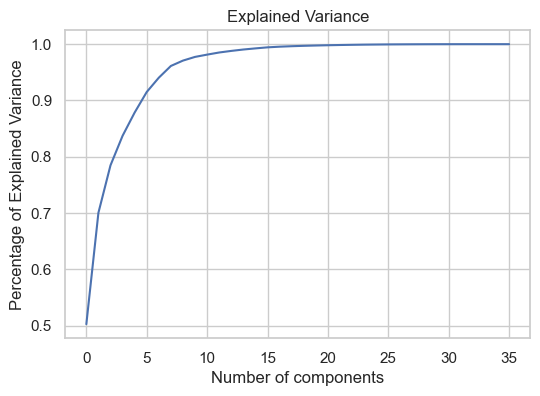

In [103]:
# Visualizing the Cumulative Sum of variance

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Percentage of Explained Variance') 
plt.title('Explained Variance')
plt.show()

So, if we chose to use only these 10 variables, this would be enough to understand what's happening in this dataset.

If we chose to use 20 variables, we would be prone to overfitting and that could affect our performance. 

In [104]:
# Let's focus on these 10 main components.
pca = PCA(n_components=10)

In [105]:
# Training and transforming the model. Note how the processing time could be affected here.
arr_pca = pca.fit_transform(df_scaled)

In [106]:
# Create the PCA column list
cols_PCA = ['PCA' + str(i) for i in range(1,11)]
cols_PCA

['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10']

In [107]:
# Let's create a dataframe with these components
df_scaled_pca = pd.DataFrame(arr_pca, columns = cols_PCA)

# Let's see what it looks like
df_scaled_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.189786,-0.225928,-0.070251,-0.061773,0.068859,-0.138118,0.036129,-0.006097,0.054610,-0.030599
1,9.243828,28.165459,9.693018,2.014850,-3.490405,6.142835,0.500527,0.333163,9.767053,1.718247
2,0.037149,0.276740,0.007367,0.076539,0.023640,-0.144762,-0.026214,0.050815,0.322028,-0.075613
3,0.224525,-0.182780,-0.168560,-0.105874,-0.069198,-0.069884,-0.085056,-0.009260,0.131555,-0.037321
4,43.391792,-9.788772,-11.472998,-9.508949,-21.790186,4.601164,-14.752986,-10.398443,1.856963,4.854270


The table above is the result of the PCA process. We'll apply standardization again a move on with the process.

In [108]:
# Fitting and transforming data
arr_pca_scaled_z = scaler.fit_transform(df_scaled_pca)

In [109]:
# Creating a new dataframe
df_pca_scaled_z = pd.DataFrame(arr_pca_scaled_z, columns = cols_PCA)

In [110]:
# Visualizing it
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093355,-0.062927
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523598,0.384415,16.696629,3.533653
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155501
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224891,-0.076753
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174450,9.983025


After that, we'll square the results. 

When we square the PCA results, we emphasize the differences between data points. This can magnify the distances from the mean or the center of the data, making outliers or unusual patterns stand out more prominently. In this case, doing this can highlight fraudulent transactions.

In [111]:
for i in range(1,11):
    col_name = 'score' + str(i)
    pca_col_name = 'PCA' + str(i)
    df_pca_scaled_z[col_name] = df_pca_scaled_z[pca_col_name] ** 2 

In [112]:
# Visualize it
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093355,-0.062927,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003960
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523598,0.384415,16.696629,3.533653,4.721539,111.367812,30.968961,2.151928,8.188490,28.722447,0.274155,0.147775,278.777410,12.486700
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155501,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224891,-0.076753,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005891
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174450,9.983025,104.038733,13.451864,43.387278,47.930008,319.134642,16.114584,238.177402,143.953726,10.077131,99.660786


Finally, let's create the first Fraud Score.

In [113]:
# Saving column names
col_scores = ['score' + str(i) for i in range(1,11)]

In [115]:
# Calculating the score
df_pca_scaled_z['Fraud Score 1'] = df_pca_scaled_z[col_scores].sum(axis = 1) ** (1 / 2)

In [116]:
# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,Fraud Score 1
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093355,-0.062927,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003960,0.211343
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523598,0.384415,16.696629,3.533653,4.721539,111.367812,30.968961,2.151928,8.188490,28.722447,0.274155,0.147775,278.777410,12.486700,21.858802
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155501,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181,0.601415
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224891,-0.076753,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005891,0.306947
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174450,9.983025,104.038733,13.451864,43.387278,47.930008,319.134642,16.114584,238.177402,143.953726,10.077131,99.660786,32.185807


In [117]:
# Saving the dataframe
df_score1 = pd.merge(data, df_pca_scaled_z.iloc[:,-1], left_index = True, right_index = True)

In [118]:
# Shape
df_score1.shape

(1070993, 32)

In [119]:
# Visualiza
df_score1.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Fraud Score 1
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004.000000,X3,0,0,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,21.858802
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004.000000,X3,0,0,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,0.601415
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004.000000,X1,709,564,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.306947
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004.000000,X1,85,551,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,32.185807
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.000000,272300000.000000,121050000.000000,122535000.000000,121050000.000000,122535000.000000,2231.000000,BATTERY PARK,10004.000000,X1,89,57,106348680.000000,107758350.000000,106348680.000000,107758350.000000,NaN,FINAL,2010/11,AC-TR,0.740916


**Part 2.4 - Building the Model - Creating the Score 2 using Autoencoder**

We'll use Deep Learning for this score.

In [122]:
# Imports
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

We'll use the 10 PCA variables as the input for the Autoencoder. PCA can be used itself as technique to extract the main component of a dataset. This output can be used to feed another ML model, since we've already reduced its dimentionality. 

In [123]:
df_pca_scaled_z.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,Fraud Score 1
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093355,-0.062927,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003960,0.211343
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523598,0.384415,16.696629,3.533653,4.721539,111.367812,30.968961,2.151928,8.188490,28.722447,0.274155,0.147775,278.777410,12.486700,21.858802
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155501,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181,0.601415
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224891,-0.076753,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005891,0.306947
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998072,3.174450,9.983025,104.038733,13.451864,43.387278,47.930008,319.134642,16.114584,238.177402,143.953726,10.077131,99.660786,32.185807


In [124]:
# Loading data with the 10 main components
df_pca = df_pca_scaled_z.iloc[:,:10]

In [126]:
# Splitting the data in test and training sets
X_train, X_test = train_test_split(df_pca, test_size = 0.2, random_state = 42)

In [127]:
# Extrai os valores
X_train = X_train.values
X_test = X_test.values

In [128]:
# Shape
X_train.shape

(856795, 10)

**Part 2.4.1 - Building the Model - Creating the Score 2 using Autoencoder - Applying the algo**

In [129]:
# Hiperparâmetros do modelo
input_dim = X_train.shape[1]                
encoding_dim = 5                               
input_layer = Input(shape = (input_dim, ))

In [130]:
# Model

# Encoder
encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation = "relu")(encoder)

# Decoder
decoder = Dense(int(encoding_dim / 2), activation = 'tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

# Final Model
autoencoder = Model(inputs = input_layer, outputs = decoder)
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
# Training hyperparameters
num_epoch = 50
batch_size = 256

In [132]:
# Compiling the model
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [133]:
# Checkpoint
checkpointer = ModelCheckpoint(filepath = "modelo/modelo_autoencoder.h5", verbose = 0, save_best_only = True)

In [134]:
tensorboard = TensorBoard(log_dir = '.\logs', 
                          histogram_freq = 0, 
                          write_graph = True, 
                          write_images = True,
                          profile_batch = 100000000)

In [135]:
# Training
history = autoencoder.fit(X_train, 
                          X_train,
                          epochs = num_epoch,
                          batch_size = batch_size,
                          shuffle = True,
                          validation_data = (X_test, X_test),
                          verbose = 1,
                          callbacks = [checkpointer, tensorboard]).history

Epoch 1/50

3347/3347 [==============================] - 8s 2ms/step - loss: 1.0106 - accuracy: 0.4443 - val_loss: 0.9238 - val_accuracy: 0.4730
Epoch 2/50
3347/3347 [==============================] - 7s 2ms/step - loss: 1.0069 - accuracy: 0.4726 - val_loss: 0.9217 - val_accuracy: 0.4929
Epoch 3/50
3347/3347 [==============================] - 7s 2ms/step - loss: 1.0052 - accuracy: 0.5012 - val_loss: 0.9201 - val_accuracy: 0.5275
Epoch 4/50
3347/3347 [==============================] - 7s 2ms/step - loss: 1.0032 - accuracy: 0.5352 - val_loss: 0.9186 - val_accuracy: 0.5421
Epoch 5/50
3347/3347 [==============================] - 7s 2ms/step - loss: 1.0015 - accuracy: 0.5467 - val_loss: 0.9169 - val_accuracy: 0.5576
Epoch 6/50
3347/3347 [==============================] - 7s 2ms/step - loss: 0.9998 - accuracy: 0.5443 - val_loss: 0.9160 - val_accuracy: 0.5392
Epoch 7/50
3347/3347 [==============================] - 7s 2ms/step - loss: 0.9982 - accuracy: 0.5419 - val_loss: 0.9145 - val_accuracy

**Part 2.4.2 - Building the Model - Creating the Score 2 using Autoencoder - Evaluating the model**

In [136]:
# Loading the model on our workspace
autoencoder = load_model('modelo/modelo_autoencoder.h5')

The graph below shows the difference in error between train and test data. It doesn't seem to be a huge difference, which is good.

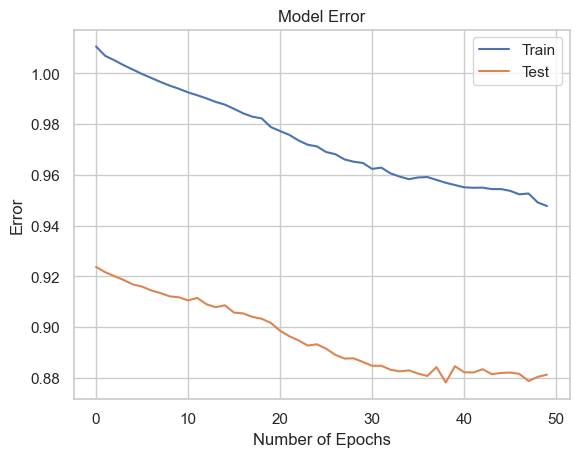

In [138]:
# Plot
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Error')
plt.ylabel('Error')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Test'], loc = 'upper right');

Now, let's predict our output. The output also consists of PCA components, because that's what we used as inputs to the model.

In [139]:
# Predictions
predictions = autoencoder.predict(df_pca)
predictions

33469/33469 [==============================] - 35s 1ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.8825817e+00, 1.1343600e+01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 4.7262592e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 8.0883503e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [140]:
# Let's store our predictions on a dataframe
df_predictions = pd.DataFrame(predictions, columns = cols_PCA)

In [141]:
# Visualizing it
df_predictions.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.882582,11.343600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.726259
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.224988,0.000000,0.124377,0.000000,0.000000,1.242212,0.000000,0.000000,0.000000,0.000000


In [142]:
# Let's create Dataframe with the autoencoder predictions
df_autoencod = pd.DataFrame(0, index = np.arange(len(df_predictions)), columns = cols_PCA)

In [143]:
# Loop
for i in range(0,10):
    df_autoencod.iloc[:,i] = (df_predictions.iloc[:,i] - df_pca_scaled_z.iloc[:,i]) ** 2

In [144]:
# Calculating the Fraud Score 2
df_autoencod['Fraud Score 2'] = df_autoencod[cols_PCA].sum(axis = 1) ** (1 / 2)

In [145]:
# Visualizing it
df_autoencod.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,Fraud Score 2
0,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003960,0.211343
1,0.084291,0.624899,30.968961,2.151928,8.188490,28.722447,0.274155,0.147775,278.777410,1.422311,18.744670
2,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181,0.601415
3,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005891,0.306947
4,99.499626,13.451864,45.041264,47.930008,319.134642,7.684456,238.177402,143.953726,10.077131,99.660786,32.009544


In [146]:
# The final Dataframe with the two scores
df_score_final = pd.merge(df_score1.iloc[:,1:], df_autoencod.iloc[:,-1], left_index = True, right_index = True)

In [147]:
# Visualizing it
df_score_final.head()

,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Fraud Score 1,Fraud Score 2
1,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004.000000,X3,0,0,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,21.858802,18.744670
2,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004.000000,X3,0,0,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,0.601415,0.601415
3,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004.000000,X1,709,564,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.306947,0.306947
4,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004.000000,X1,85,551,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,32.185807,32.009544
5,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.000000,272300000.000000,121050000.000000,122535000.000000,121050000.000000,122535000.000000,2231.000000,BATTERY PARK,10004.000000,X1,89,57,106348680.000000,107758350.000000,106348680.000000,107758350.000000,NaN,FINAL,2010/11,AC-TR,0.740916,0.740916


Now, We're going to create the rank for scores 1 and 2, and then we'll find the final score. Using the rank positions and the score itself.

In [148]:
# Calculating Score 1 Ranking
df_score_final['Rank_Fraud Score 1'] = df_score_final['Fraud Score 1'].rank(ascending = True, method = 'first')
df_score_final.head()

,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1
1,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004.000000,X3,0,0,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,21.858802,18.744670,1070273.000000
2,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004.000000,X3,0,0,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,0.601415,0.601415,1023938.000000
3,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004.000000,X1,709,564,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.306947,0.306947,964206.000000
4,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004.000000,X1,85,551,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,32.185807,32.009544,1070372.000000
5,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.000000,272300000.000000,121050000.000000,122535000.000000,121050000.000000,122535000.000000,2231.000000,BATTERY PARK,10004.000000,X1,89,57,106348680.000000,107758350.000000,106348680.000000,107758350.000000,NaN,FINAL,2010/11,AC-TR,0.740916,0.740916,1033268.000000


In [149]:
# Calculating Score 2 Ranking
df_score_final['Rank_Fraud Score 2'] = df_score_final['Fraud Score 2'].rank(ascending = True, method = 'first')
df_score_final.head()

,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
1,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004.000000,X3,0,0,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,21.858802,18.744670,1070273.000000,1070249.000000
2,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004.000000,X3,0,0,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,0.601415,0.601415,1023938.000000,1029297.000000
3,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004.000000,X1,709,564,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.306947,0.306947,964206.000000,977891.000000
4,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004.000000,X1,85,551,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,32.185807,32.009544,1070372.000000,1070498.000000
5,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.000000,272300000.000000,121050000.000000,122535000.000000,121050000.000000,122535000.000000,2231.000000,BATTERY PARK,10004.000000,X1,89,57,106348680.000000,107758350.000000,106348680.000000,107758350.000000,NaN,FINAL,2010/11,AC-TR,0.740916,0.740916,1033268.000000,1037642.000000


In [150]:
# Sorting data by the rank position
df_score_final.sort_values('Rank_Fraud Score 1', ascending = False).head()

,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
632815,4,1841,1,NaN,THE 89 BONNIE REALTY,D4,2,251,181,NaN,6.000000,3610000.000000,285750.000000,1624500.000000,73346.000000,73346.000000,1015.000000,89-20 55 AVENUE,11373.000000,NaN,218,163,285750.000000,1844100.000000,75350.000000,75350.000000,1017.000000,FINAL,2010/11,AC-TR,1024.704966,1020.977331,1070993.000000,1070993.000000
565391,3,8590,650,NaN,JOINTLY OWNED PLAYGRO,W1,4,547,172,E,2.000000,6750000.000000,422550.000000,3037500.000000,422550.000000,3037500.000000,2151.000000,2529 GERRITSEN AVENUE,11229.000000,X1,75,300,377550.000000,2714400.000000,377550.000000,2714400.000000,NaN,FINAL,2010/11,AC-TR,914.746995,902.020815,1070992.000000,1070992.000000
917941,4,14255,2789,NaN,DCAS,V0,1B,10,17,NaN,NaN,6400.000000,166.000000,166.000000,0.000000,0.000000,NaN,165 AVENUE,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,870.176077,860.808832,1070991.000000,1070990.000000
132748,1,1875,46,NaN,2710-2714 BROADWAY LL,K9,4,70,69,NaN,3.000000,2010000.000000,211950.000000,904500.000000,0.000000,432000.000000,1986.000000,2710 BROADWAY,10025.000000,NaN,71,69,211950.000000,742500.000000,NaN,315000.000000,NaN,FINAL,2010/11,AC-TR,866.911672,862.840777,1070990.000000,1070991.000000
1067359,5,7853,84,NaN,JOLINE ESTATES HOMEOW,V0,1B,31,70,NaN,NaN,216000.000000,153.000000,153.000000,0.000000,0.000000,NaN,JOLINE AVENUE,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,830.451006,815.348460,1070989.000000,1070989.000000


Now, let's create the final score using:

*Score 1 * (Its position in the Rank of Scores 1) + Score 2 * (Its position in the Rank of Scores 2)*

In [151]:
# Final Score
df_score_final['Final Score'] = (df_score_final['Fraud Score 1'] * df_score_final['Rank_Fraud Score 1']) + (df_score_final['Fraud Score 2'] * df_score_final['Rank_Fraud Score 2'])

In [156]:
# Final Score Rank
df_score_final['Final Rank'] = df_score_final['Final Score'].rank(ascending = False, method = 'first')

In [160]:
df_score_final['Final Rank'] = round(df_score_final['Final Rank'])

In [161]:
# Results
df_score_final.sort_values('Final Rank', ascending = True).head(20)

,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2,Final Score,Final Rank
632815,4,1841,1,NaN,THE 89 BONNIE REALTY,D4,2,251,181,NaN,6.000000,3610000.000000,285750.000000,1624500.000000,73346.000000,73346.000000,1015.000000,89-20 55 AVENUE,11373.000000,NaN,218,163,285750.000000,1844100.000000,75350.000000,75350.000000,1017.000000,FINAL,2010/11,AC-TR,1024.704966,1020.977331,1070993.000000,1070993.000000,2190911421.118324,1.000000
565391,3,8590,650,NaN,JOINTLY OWNED PLAYGRO,W1,4,547,172,E,2.000000,6750000.000000,422550.000000,3037500.000000,422550.000000,3037500.000000,2151.000000,2529 GERRITSEN AVENUE,11229.000000,X1,75,300,377550.000000,2714400.000000,377550.000000,2714400.000000,NaN,FINAL,2010/11,AC-TR,914.746995,902.020815,1070992.000000,1070992.000000,1945743790.242921,2.000000
917941,4,14255,2789,NaN,DCAS,V0,1B,10,17,NaN,NaN,6400.000000,166.000000,166.000000,0.000000,0.000000,NaN,165 AVENUE,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,870.176077,860.808832,1070991.000000,1070990.000000,1853868397.297904,3.000000
132748,1,1875,46,NaN,2710-2714 BROADWAY LL,K9,4,70,69,NaN,3.000000,2010000.000000,211950.000000,904500.000000,0.000000,432000.000000,1986.000000,2710 BROADWAY,10025.000000,NaN,71,69,211950.000000,742500.000000,NaN,315000.000000,NaN,FINAL,2010/11,AC-TR,866.911672,862.840777,1070990.000000,1070991.000000,1852548438.316694,4.000000
1067359,5,7853,84,NaN,JOLINE ESTATES HOMEOW,V0,1B,31,70,NaN,NaN,216000.000000,153.000000,153.000000,0.000000,0.000000,NaN,JOLINE AVENUE,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,830.451006,815.348460,1070989.000000,1070989.000000,1762633123.965435,5.000000
585117,4,418,113,NaN,41ST AVENUE REALTY AS,V1,4,5,62,NaN,NaN,17400.000000,7830.000000,7830.000000,0.000000,0.000000,NaN,29 STREET,11101.000000,NaN,0,0,7308.000000,7308.000000,NaN,NaN,NaN,FINAL,2010/11,AC-TR,652.679862,639.900633,1070988.000000,1070988.000000,1384338198.602191,6.000000
585438,4,459,1,NaN,JOHN YOUNG ASSOCIATES,O9,4,103,140,EG,2.000000,766000.000000,135000.000000,344700.000000,0.000000,181350.000000,1986.000000,11-17 43 AVENUE,11101.000000,NaN,40,60,135000.000000,405719.000000,NaN,242370.000000,NaN,FINAL,2010/11,AC-TR,647.498439,634.896126,1070987.000000,1070987.000000,1373427907.638514,7.000000
248664,2,5649,150,NaN,PARKS AND RECREATION,Q1,4,625,400,NaN,NaN,548000.000000,246600.000000,246600.000000,246600.000000,246600.000000,2231.000000,CHIMNEY SWEEP ISLAND,NaN,X1,0,0,220500.000000,220500.000000,220500.000000,220500.000000,NaN,FINAL,2010/11,AC-TR,609.819252,606.519599,1070986.000000,1070986.000000,1302681880.659059,8.000000
85885,1,1254,2,NaN,NATIONAL RAILROAD ETA,U6,3,66,4463,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,RIVERSIDE PARK,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,479.295972,469.873968,1070985.000000,1070985.000000,1016546768.105846,9.000000
918203,4,15100,600,NaN,U S GOVERNMENT OWNRD,V9,4,356,678,NaN,NaN,19280800.000000,8676360.000000,8676360.000000,8676360.000000,8676360.000000,4600.000000,159 STREET,NaN,X1,0,0,6993144.000000,6993144.000000,6993144.000000,6993144.000000,NaN,FINAL,2010/11,AC-TR,469.130795,461.977393,1070984.000000,1070984.000000,997201972.051178,10.000000
